# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

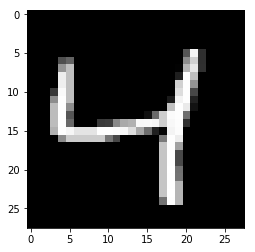

In [6]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [31]:
mnist.train.images.shape

(60000, 784)

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [33]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, mnist.train.images.shape[1]])
targets_ = tf.placeholder(tf.float32, [None, mnist.train.images.shape[1]])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, units=encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, units=mnist.train.images.shape[1])
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [34]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [35]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6941
Epoch: 1/20... Training loss: 0.6903
Epoch: 1/20... Training loss: 0.6869
Epoch: 1/20... Training loss: 0.6829
Epoch: 1/20... Training loss: 0.6781
Epoch: 1/20... Training loss: 0.6721
Epoch: 1/20... Training loss: 0.6652
Epoch: 1/20... Training loss: 0.6562
Epoch: 1/20... Training loss: 0.6478
Epoch: 1/20... Training loss: 0.6346
Epoch: 1/20... Training loss: 0.6214
Epoch: 1/20... Training loss: 0.6071
Epoch: 1/20... Training loss: 0.5935
Epoch: 1/20... Training loss: 0.5768
Epoch: 1/20... Training loss: 0.5596
Epoch: 1/20... Training loss: 0.5435
Epoch: 1/20... Training loss: 0.5241
Epoch: 1/20... Training loss: 0.5058
Epoch: 1/20... Training loss: 0.4882
Epoch: 1/20... Training loss: 0.4723
Epoch: 1/20... Training loss: 0.4564
Epoch: 1/20... Training loss: 0.4369
Epoch: 1/20... Training loss: 0.4238
Epoch: 1/20... Training loss: 0.4101
Epoch: 1/20... Training loss: 0.3926
Epoch: 1/20... Training loss: 0.3851
Epoch: 1/20... Training loss: 0.3678
E

Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1973
Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1845
E

Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1615
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1618
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1633
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1504
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1492
E

Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1379
E

Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1234
E

Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1100
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1129
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1163
E

Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1097
E

Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1001
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1035
E

Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1069
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1021
E

Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1033
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0980
E

Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1016
E

Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0971
E

Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0895
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0989
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0991
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0886
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0894
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0893
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0881
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0889
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0980
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0880
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0892
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0886
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.0972
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

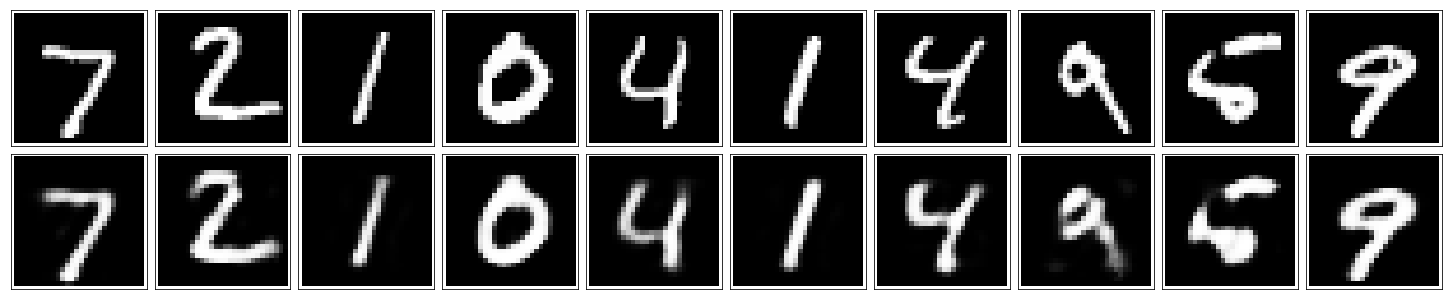

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [27]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.